# This file will train a network on many replicas of a set, then produce the mean CFFs found

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import numpy as np
import pandas as pd 
from BHDVCS_torch import TBHDVCS

import matplotlib
import matplotlib.pyplot as plt

import sys
import time
from scipy.stats import chisquare

In [2]:
tb = TBHDVCS()

f = tb.TotalUUXS_curve_fit3
g = tb.TotalUUXS_curve_fit
loss_func = tb.loss_MSE_errs

In [3]:
dats = pd.read_csv('dvcs_psuedo.csv')
n = np.array(dats['#Set'])
ind = np.array(dats['index'])
k = np.array(dats['k'])
qq = np.array(dats['QQ'])
xb = np.array(dats['x_b'])
t = np.array(dats['t'])
phi = np.array(dats['phi_x'])
F = np.array(dats['F'])
errF = np.array(dats['errF']) 
F1 = np.array(dats['F1'])
F2 = np.array(dats['F2'])
const = np.array(dats['dvcs'])  
ReH_target = np.array(dats['ReH']) 
ReE_target = np.array(dats['ReE']) 
ReHT_target = np.array(dats['ReHtilde'])
yrep = []

errs_H = []
errs_E = []
errs_HT = []

rep_ReH = []
rep_ReE = []
rep_ReHT = []

In [4]:
blank_net = torch.nn.Sequential(
        torch.nn.Linear(4, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 100),
        torch.nn.Tanh(),
        torch.nn.Linear(100, 80),
        torch.nn.Tanh(),
        torch.nn.Linear(80, 3)
    )

In [5]:
optimizer = torch.optim.Adam(blank_net.parameters(), lr=0.02)

In [6]:
EPOCH = 2500

In [7]:
reps = 10

In [8]:
fVals = np.zeros((100,36))
fitErrs = np.zeros((36))

## Training:

100.00% done with set #0.
Mean ReH for set 0 = 13.06 vs. real ReH = 13.52, error = 3.53, variance = 1.00, sigma = 0.32
Mean ReE for set 0 = -53.06 vs. real ReE = -55.72, error = 5.02, variance = 29.30, sigma = 1.71
Mean ReHT for set 0 = 7.25 vs. real ReHT = 6.60, error = 8.97, variance = 0.37, sigma = 0.19

Spread at phi = 180: 4.96e-03


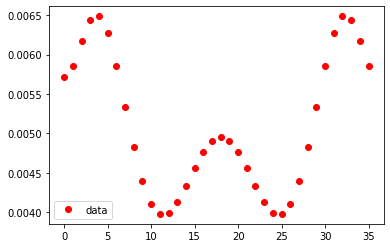

Average Sigma in Results = 5.10e-03


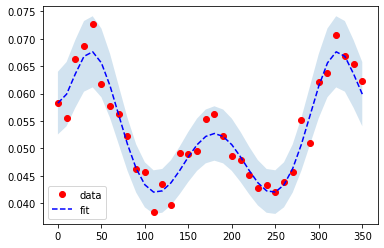

100.00% done with set #1.
Mean ReH for set 1 = 12.55 vs. real ReH = 11.78, error = 6.14, variance = 6.02, sigma = 0.78
Mean ReE for set 1 = -52.55 vs. real ReE = -48.02, error = 8.63, variance = 166.48, sigma = 4.08
Mean ReHT for set 1 = 6.97 vs. real ReHT = 7.29, error = 4.50, variance = 1.63, sigma = 0.40

Spread at phi = 180: 5.95e-03


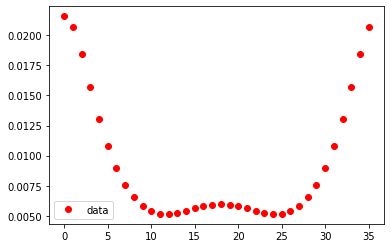

Average Sigma in Results = 9.17e-03


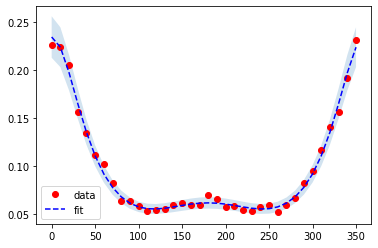

100.00% done with set #2.
Mean ReH for set 2 = 7.22 vs. real ReH = 7.58, error = 4.94, variance = 4.33, sigma = 0.66
Mean ReE for set 2 = -47.22 vs. real ReE = -49.24, error = 4.27, variance = 144.57, sigma = 3.80
Mean ReHT for set 2 = 4.01 vs. real ReHT = 4.10, error = 2.23, variance = 0.63, sigma = 0.25

Spread at phi = 180: 3.07e-03


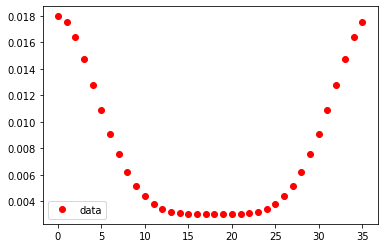

Average Sigma in Results = 7.67e-03


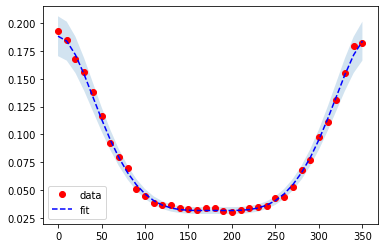

100.00% done with set #3.
Mean ReH for set 3 = 7.65 vs. real ReH = 9.26, error = 20.96, variance = 8.22, sigma = 0.91
Mean ReE for set 3 = -47.65 vs. real ReE = -55.77, error = 17.04, variance = 206.05, sigma = 4.54
Mean ReHT for set 3 = 4.25 vs. real ReHT = 4.55, error = 7.08, variance = 0.40, sigma = 0.20

Spread at phi = 180: 1.53e-03


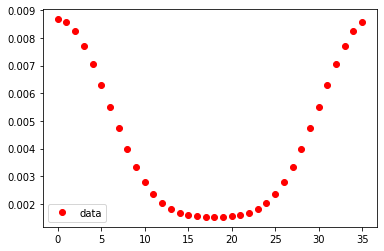

Average Sigma in Results = 4.22e-03


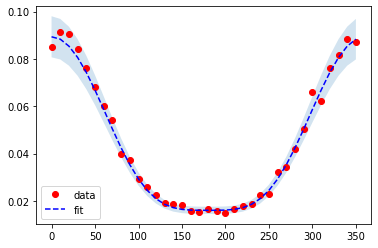

100.00% done with set #4.
Mean ReH for set 4 = 12.55 vs. real ReH = 11.54, error = 8.06, variance = 2.29, sigma = 0.48
Mean ReE for set 4 = -52.55 vs. real ReE = -47.17, error = 10.26, variance = 60.42, sigma = 2.46
Mean ReHT for set 4 = 6.97 vs. real ReHT = 7.38, error = 5.83, variance = 0.43, sigma = 0.21

Spread at phi = 180: 3.21e-03


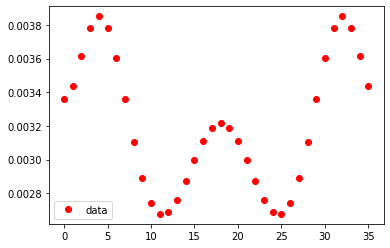

Average Sigma in Results = 3.21e-03


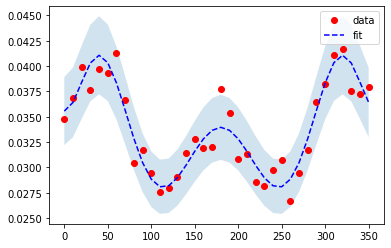

100.00% done with set #5.
Mean ReH for set 5 = 7.22 vs. real ReH = 6.94, error = 3.98, variance = 3.74, sigma = 0.61
Mean ReE for set 5 = -47.22 vs. real ReE = -45.50, error = 3.66, variance = 120.71, sigma = 3.47
Mean ReHT for set 5 = 4.01 vs. real ReHT = 4.65, error = 15.74, variance = 0.97, sigma = 0.31

Spread at phi = 180: 1.93e-03


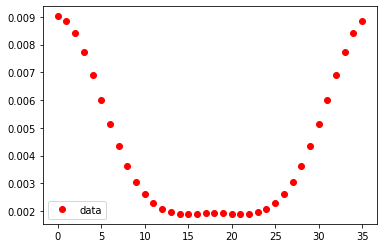

Average Sigma in Results = 4.23e-03


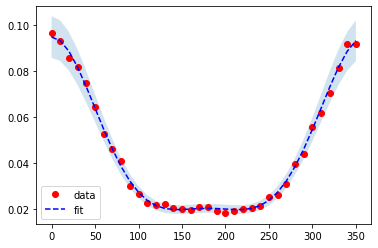

100.00% done with set #6.
Mean ReH for set 6 = 11.74 vs. real ReH = 9.54, error = 18.76, variance = 7.77, sigma = 0.88
Mean ReE for set 6 = -51.74 vs. real ReE = -38.93, error = 24.76, variance = 253.91, sigma = 5.04
Mean ReHT for set 6 = 6.52 vs. real ReHT = 7.44, error = 14.00, variance = 2.24, sigma = 0.47

Spread at phi = 180: 3.49e-03


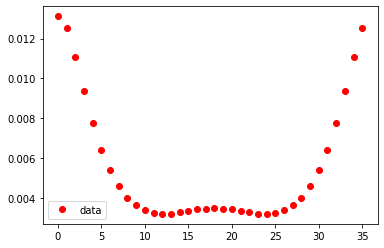

Average Sigma in Results = 5.53e-03


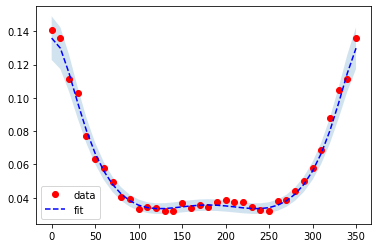

100.00% done with set #7.
Mean ReH for set 7 = 7.65 vs. real ReH = 10.03, error = 31.04, variance = 4.04, sigma = 0.64
Mean ReE for set 7 = -47.65 vs. real ReE = -59.83, error = 25.55, variance = 102.68, sigma = 3.20
Mean ReHT for set 7 = 4.25 vs. real ReHT = 5.79, error = 36.11, variance = 2.30, sigma = 0.48

Spread at phi = 180: 1.09e-03


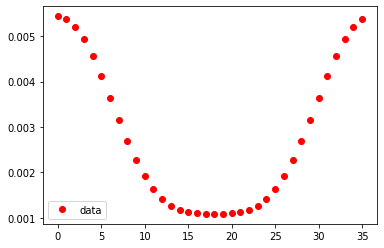

Average Sigma in Results = 2.77e-03


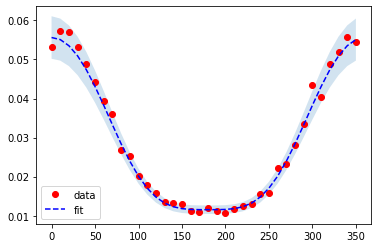

100.00% done with set #8.
Mean ReH for set 8 = 12.55 vs. real ReH = 11.97, error = 4.65, variance = 1.05, sigma = 0.32
Mean ReE for set 8 = -52.55 vs. real ReE = -49.62, error = 5.59, variance = 28.06, sigma = 1.68
Mean ReHT for set 8 = 6.97 vs. real ReHT = 6.86, error = 1.70, variance = 0.58, sigma = 0.24

Spread at phi = 180: 2.30e-03


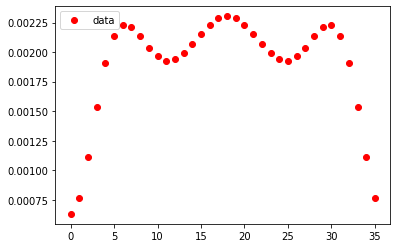

Average Sigma in Results = 1.89e-03


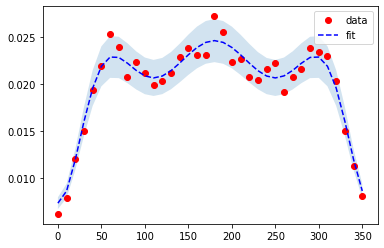

100.00% done with set #9.
Mean ReH for set 9 = 6.99 vs. real ReH = 8.17, error = 16.89, variance = 0.53, sigma = 0.23
Mean ReE for set 9 = -46.99 vs. real ReE = -53.92, error = 14.74, variance = 20.45, sigma = 1.43
Mean ReHT for set 9 = 3.88 vs. real ReHT = 3.17, error = 18.40, variance = 0.12, sigma = 0.11

Spread at phi = 180: 1.79e-03


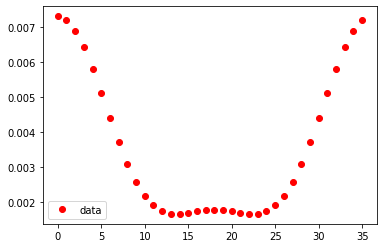

Average Sigma in Results = 3.57e-03


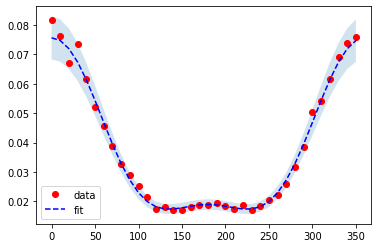

100.00% done with set #10.
Mean ReH for set 10 = 7.22 vs. real ReH = 6.31, error = 12.71, variance = 2.58, sigma = 0.51
Mean ReE for set 10 = -47.22 vs. real ReE = -41.85, error = 11.38, variance = 75.03, sigma = 2.74
Mean ReHT for set 10 = 4.01 vs. real ReHT = 3.99, error = 0.46, variance = 0.63, sigma = 0.25

Spread at phi = 180: 1.50e-03


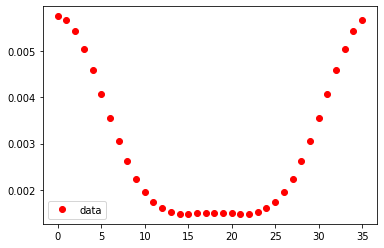

Average Sigma in Results = 2.93e-03


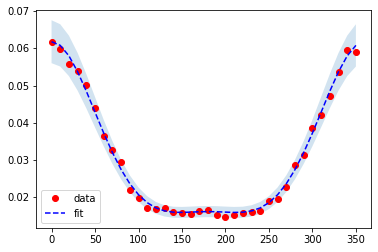

100.00% done with set #11.
Mean ReH for set 11 = 11.74 vs. real ReH = 10.76, error = 8.38, variance = 1.30, sigma = 0.36
Mean ReE for set 11 = -51.74 vs. real ReE = -46.09, error = 10.92, variance = 38.91, sigma = 1.97
Mean ReHT for set 11 = 6.52 vs. real ReHT = 6.79, error = 4.07, variance = 0.41, sigma = 0.20

Spread at phi = 180: 2.46e-03


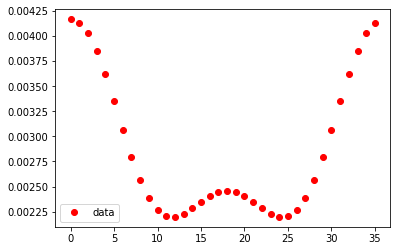

Average Sigma in Results = 2.86e-03


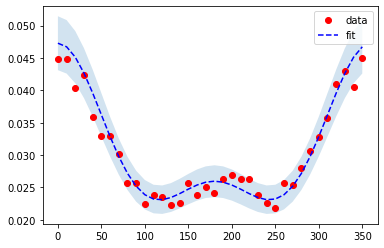

100.00% done with set #12.
Mean ReH for set 12 = 6.99 vs. real ReH = 7.24, error = 3.55, variance = 1.26, sigma = 0.35
Mean ReE for set 12 = -46.99 vs. real ReE = -48.34, error = 2.86, variance = 49.16, sigma = 2.22
Mean ReHT for set 12 = 3.88 vs. real ReHT = 3.00, error = 22.77, variance = 0.23, sigma = 0.15

Spread at phi = 180: 1.52e-03


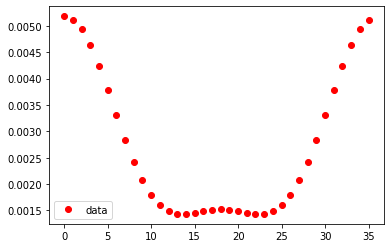

Average Sigma in Results = 2.72e-03


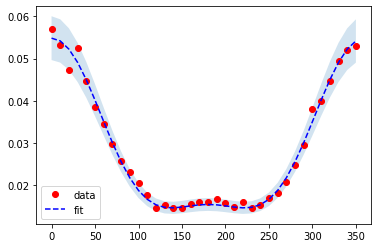

100.00% done with set #13.
Mean ReH for set 13 = 7.22 vs. real ReH = 6.48, error = 10.25, variance = 3.20, sigma = 0.57
Mean ReE for set 13 = -47.22 vs. real ReE = -43.00, error = 8.95, variance = 105.63, sigma = 3.25
Mean ReHT for set 13 = 4.01 vs. real ReHT = 4.09, error = 1.89, variance = 0.86, sigma = 0.29

Spread at phi = 180: 1.33e-03


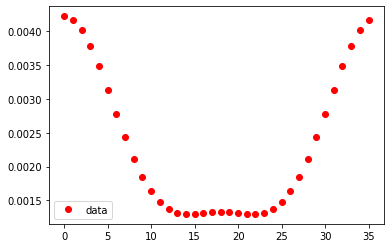

Average Sigma in Results = 2.31e-03


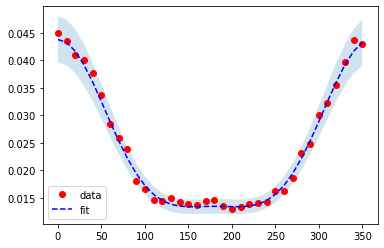

In [9]:
for datset in range(14):
    rep_ReH = []
    rep_ReE = []
    rep_ReHT = []
    rep_ReH.clear()
    rep_ReE.clear()
    rep_ReHT.clear()
    
    i = datset
    a = 36*i # start index of set
    b = a+36 # end index of set

    for j in range(reps): # create n replicas
        start = time.time()
        net = blank_net # untrain/reset network

        yrep = [0] * (b-a) # create array to be filled with replicated F values

        for l in range(b-a): # populate yrep with random normal values with mean = F and sd = errF

            yind = a+l # index of data point 
            yrep[l] = (np.random.normal(F[yind], errF[yind]))


        xdat = np.array([phi[a:b], qq[a:b], xb[a:b], t[a:b], k[a:b], F1[a:b], F2[a:b], const[a:b]])
        ydat = np.array(yrep)

        x = Variable(torch.from_numpy(xdat[1:5].transpose()))
        y = Variable(torch.from_numpy(ydat.transpose()))

        xdat = Variable(torch.from_numpy(xdat))

        errs = Variable(torch.from_numpy(errF[a:b]))

        for epoch in range(EPOCH):

            p = net(x.float()) #output arrays for 3 predicted values for cffs

            hs = torch.transpose(p, 0, 1)[0] # array of 36 values for ReH at each increment of phi
            es = torch.transpose(p, 0, 1)[1] # array of 36 values for ReE at each increment of phi
            hts = torch.transpose(p, 0, 1)[2] # array of 36 values for ReHT at each increment of phi

            ReHfit = torch.mean(hs)
            ReEfit = torch.mean(es)
            ReHTfit = torch.mean(hts)

            cffs = [ReHfit, ReEfit, ReHTfit]

            loss = loss_func((xdat.float()), cffs, errs, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            pctdone = ((float(2500*(j)+epoch)*100)/float(reps*EPOCH))
            sys.stdout.write("\r%.2f%% done with set #%d." % ((pctdone, i)))
            sys.stdout.flush()

        fVals[j] = g(xdat.float(), hs.data.numpy(), es.data.numpy(), hts.data.numpy())

        ReHfit = torch.mean(torch.transpose(p, 0, 1)[0]).data.numpy()
        ReEfit = torch.mean(torch.transpose(p, 0, 1)[1]).data.numpy()
        ReHTfit = torch.mean(torch.transpose(p, 0, 1)[2]).data.numpy()
        fit_cffs = [ReHfit, ReEfit, ReHTfit]

    #     plt.plot(phi[a:b], F[a:b], 'ro', label='data')
    #     plt.plot(phi[a:b], f(xdat,fit_cffs), 'b--', label='fit')
    #     plt.legend()
    #     plt.show()

        rep_ReH.append(ReHfit)
        rep_ReE.append(ReEfit)
        rep_ReHT.append(ReHTfit)

    #     print("\nReH on replica %d: %.2f vs real ReH: %.2f. Error = %.2f" % (j, cffs[0], ReH_target[a], abs(100*(abs(np.mean(rep_ReH)-ReH_target[a]))/ReH_target[a])))
    #     print("ReE on replica %d: %.2f vs real ReE: %.2f. Error = %.2f" % (j, cffs[1], ReE_target[a], abs(100*(abs(np.mean(rep_ReE)-ReE_target[a]))/ReE_target[a])))
    #     print("ReHT on replica %d: %.2f vs real ReHT: %.2f. Error = %.2f" % (j, cffs[2], ReHT_target[a], abs(100*(abs(np.mean(rep_ReHT)-ReHT_target[a]))/ReHT_target[a])))

    rep_ReH = np.array(rep_ReH)
    rep_ReE = np.array(rep_ReE)
    rep_ReHT = np.array(rep_ReHT)

    err_H = abs(100*(abs(np.mean(rep_ReH)-ReH_target[a]))/ReH_target[a])
    err_E = abs(100*(abs(np.mean(rep_ReE)-ReE_target[a]))/ReE_target[a])
    err_HT = abs(100*(abs(np.mean(rep_ReHT)-ReHT_target[a]))/ReHT_target[a])
    
    print('\nMean ReH for set %d = %.2f vs. real ReH = %.2f, error = %.2f, variance = %.2f, sigma = %.2f' % (i, ReH_target[a] ,np.mean(rep_ReH), err_H, np.var(rep_ReH), np.sqrt(np.var(rep_ReH))/np.sqrt(reps)))
    print('Mean ReE for set %d = %.2f vs. real ReE = %.2f, error = %.2f, variance = %.2f, sigma = %.2f' % (i, ReE_target[a], np.mean(rep_ReE), err_E, np.var(rep_ReE), np.sqrt(np.var(rep_ReE))/np.sqrt(reps)))
    print('Mean ReHT for set %d = %.2f vs. real ReHT = %.2f, error = %.2f, variance = %.2f, sigma = %.2f\n' % (i, ReHT_target[a], np.mean(rep_ReHT), err_HT, np.var(rep_ReHT), np.sqrt(np.var(rep_ReHT))/np.sqrt(reps)))

    vals = np.transpose(fVals)

    for fspr in range(len(vals)):
        fitErrs[fspr] = np.sqrt(np.var(vals[fspr]))/np.sqrt(reps)
        
    print("Spread at phi = 180: %.2e" % (fitErrs[18]))
    plt.plot(fitErrs, 'ro', label='data')
    plt.legend()
    plt.show()
    
    print("Average Sigma in Results = %.2e" % np.mean(np.abs(np.asarray(fitErrs))))

    plt.plot(phi[a:b], F[a:b], 'ro', label='data')
    plt.plot(phi[a:b], f(xdat,fit_cffs), 'b--', label='fit')
    plt.fill_between(phi[a:b], f(xdat,fit_cffs)-fitErrs, f(xdat,fit_cffs)+fitErrs, alpha = 0.2)
    plt.legend()
    plt.show()